In [2]:
import ast
import pandas as pd
import seaborn as sns
from datasets import load_dataset
import matplotlib.pyplot as plt

df = pd.read_csv("../data/Students Social Media Addiction.csv")

In [5]:
df_clean = df.dropna(subset=["Avg_Daily_Usage_Hours", "Sleep_Hours_Per_Night", "Mental_Health_Score"])

In [ ]:
corr = df[["Avg_Daily_Usage_Hours", "Sleep_Hours_Per_Night", "Mental_Health_Score"]].corr()
corr

,Avg_Daily_Usage_Hours,Sleep_Hours_Per_Night,Mental_Health_Score
Avg_Daily_Usage_Hours,1.000000,-0.790582,-0.801058
Sleep_Hours_Per_Night,-0.790582,1.000000,0.707439
Mental_Health_Score,-0.801058,0.707439,1.000000


In [7]:
df["Usage_Bucket"] = pd.cut(df["Avg_Daily_Usage_Hours"], bins=[0,2,4,6,8,12], labels=["0-2h", "2-4h", "4-6h", "6-8h", "8h+"])

In [10]:
sleep_mental_health = (df_clean.groupby("Usage_Bucket")[["Sleep_Hours_Per_Night", "Mental_Health_Score"]].mean().reset_index())
sleep_mental_health

C:\Users\AndriannaWardill\AppData\Local\Temp\ipykernel_15524\1004155977.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  sleep_mental_health = (df_clean.groupby("Usage_Bucket")[["Sleep_Hours_Per_Night", "Mental_Health_Score"]].mean().reset_index())


,Usage_Bucket,Sleep_Hours_Per_Night,Mental_Health_Score
0,0-2h,7.900000,8.500000
1,2-4h,8.046108,7.413174
2,4-6h,6.800763,6.180662
3,6-8h,5.727536,4.934783
4,8h+,4.000000,5.000000


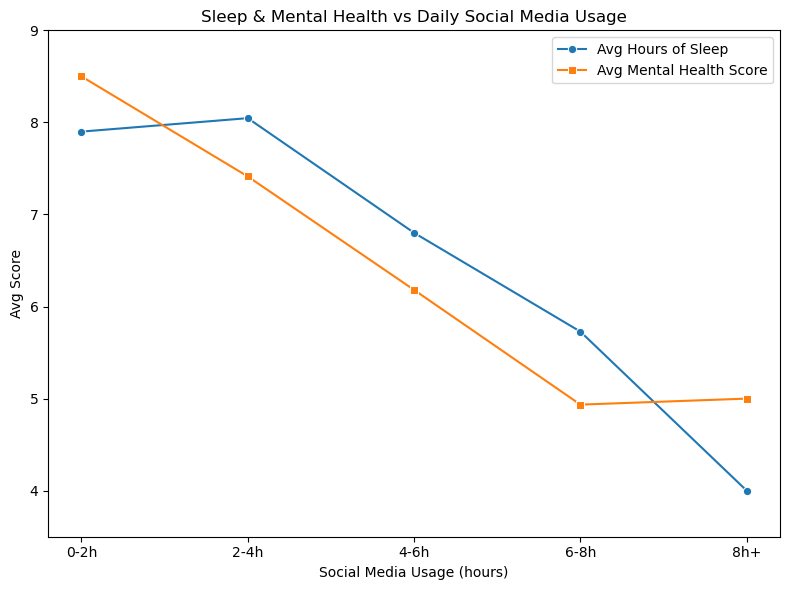

In [20]:
plt.figure(figsize=(8,6))
sns.lineplot(
    x="Usage_Bucket",
    y="Sleep_Hours_Per_Night",
    data=sleep_mental_health,
    marker='o',
    label="Avg Hours of Sleep"
)

sns.lineplot(
    x="Usage_Bucket",
    y="Mental_Health_Score",
    data=sleep_mental_health,
    marker='s',
    label="Avg Mental Health Score"
)

plt.title("Sleep & Mental Health vs Daily Social Media Usage")
plt.xlabel("Social Media Usage (hours)")
plt.ylabel("Avg Score")
plt.ylim(3.5,9)
plt.legend()
plt.tight_layout()
plt.show()